In [1]:
import excursion.utils as utils
from excursion import get_gp
import excursion.optimize as optimize
import numpy as np
import scipy.stats
import excursion.plotting.twodim as plots
import os
np.warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
truth0 = lambda X: np.atleast_1d(scipy.stats.multivariate_normal.pdf(X,mean = [0.3,0.2], cov = np.diag([0.2,0.3])))
truth1 = lambda X: np.atleast_1d(scipy.stats.multivariate_normal.pdf(X,mean = [0.2,0.3], cov = np.diag([0.2,0.3])))


class scan(object):
    def __init__(self, functions):
        self.truth_functions = functions
        self.plot_rangedef = np.asarray([[0,1,101],[0,1,101]])
        self.plotG = utils.mgrid(self.plot_rangedef)
        self.plotX = utils.mesh2points(self.plotG,self.plot_rangedef[:,2])

        self.acq_rangedef = np.asarray([[0,1,21],[0,1,21]])
        self.acqG = utils.mgrid(self.acq_rangedef)
        self.acqX = utils.mesh2points(self.acqG,self.acq_rangedef[:,2])

        self.mean_rangedef = np.asarray([[0,1,21],[0,1,21]])
        self.meanG = utils.mgrid(self.mean_rangedef)
        self.meanX = utils.mesh2points(self.meanG,self.mean_rangedef[:,2])
        
        self.thresholds = [0.58,0.6,0.62]
    def invalid_region(self,X):
        return np.zeros(X.shape[0], dtype = 'bool')

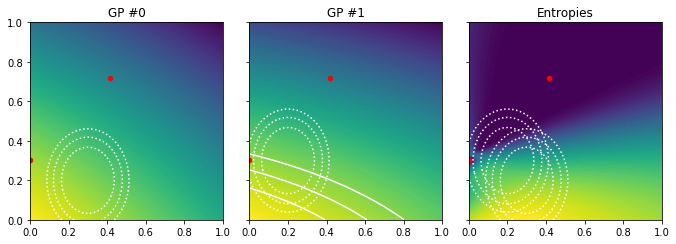

Iteration 0. new x: [[0.6  0.15]
 [0.7  0.35]]
Iteration 0. Evaluted function 0 to values: [0.51667647 0.41950841]
Iteration 0. Evaluted function 1 to values: [0.41950841 0.3463386 ]


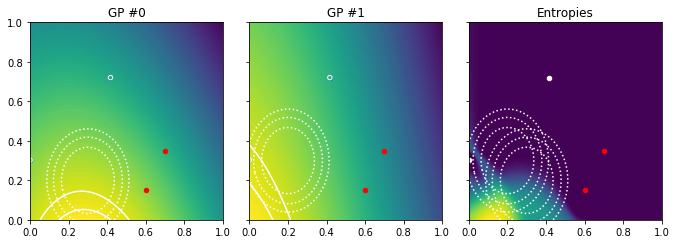

Iteration 1. new x: [[0.2  0.05]
 [0.25 0.15]]
Iteration 1. Evaluted function 0 to values: [0.61038113 0.64301426]
Iteration 1. Evaluted function 1 to values: [0.58547115 0.62193375]


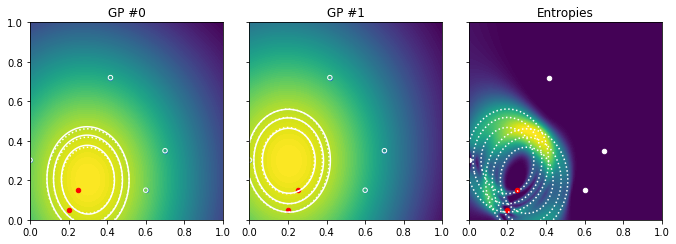

Iteration 2. new x: [[0.15 0.5 ]
 [0.2  0.3 ]]
Iteration 2. Evaluted function 0 to values: [0.52865369 0.62323079]
Iteration 2. Evaluted function 1 to values: [0.604056   0.64974733]


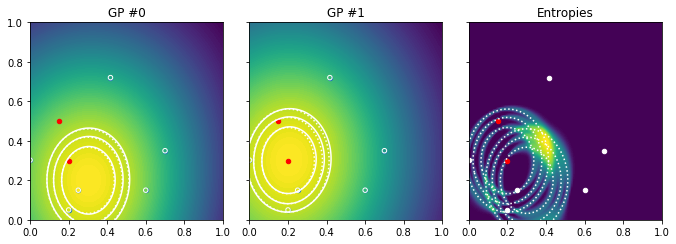

Iteration 3. new x: [[0.4  0.35]
 [0.3  0.05]]
Iteration 3. Evaluted function 0 to values: [0.61038113 0.62583301]
Iteration 3. Evaluted function 1 to values: [0.58547115 0.57101581]


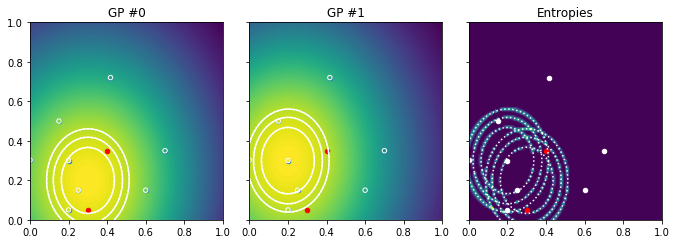

Iteration 4. new x: [[0.  0.2]
 [0.1 0.1]]
Iteration 4. Evaluted function 0 to values: [0.51883378 0.57819831]
Iteration 4. Evaluted function 1 to values: [0.57819831 0.59283547]


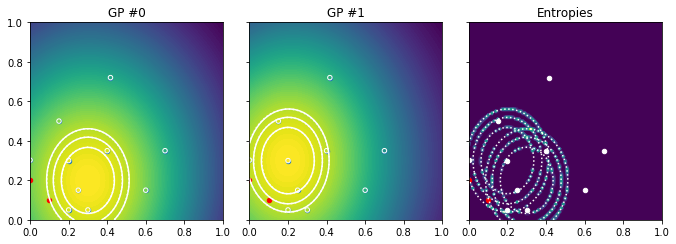

Iteration 5. new x: [[0.5 0.3]
 [0.3 0.5]]
Iteration 5. Evaluted function 0 to values: [0.57819831 0.55924271]
Iteration 5. Evaluted function 1 to values: [0.51883378 0.59283547]


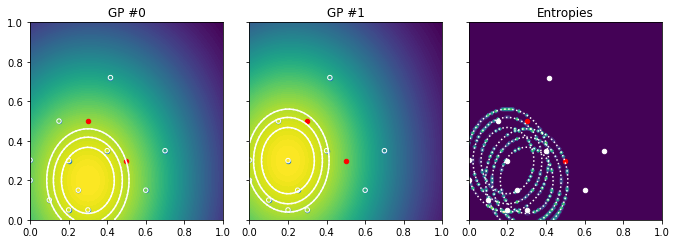

Iteration 6. new x: [[0.5  0.1 ]
 [0.45 0.05]]
Iteration 6. Evaluted function 0 to values: [0.57819831 0.59160168]
Iteration 6. Evaluted function 1 to values: [0.48537263 0.50078001]


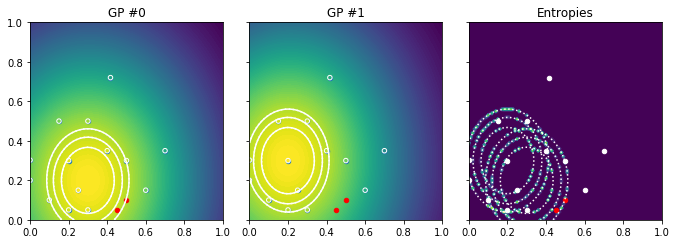

Iteration 7. new x: [[0.15 0.55]
 [0.   0.4 ]]
Iteration 7. Evaluted function 0 to values: [0.50078001 0.48537263]
Iteration 7. Evaluted function 1 to values: [0.58182336 0.57819831]


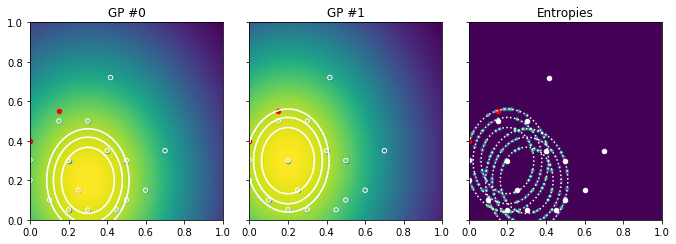

Iteration 8. new x: [[0.1  0.3 ]
 [0.05 0.3 ]]
Iteration 8. Evaluted function 0 to values: [0.57819831 0.54657247]
Iteration 8. Evaluted function 1 to values: [0.63370502 0.61420796]


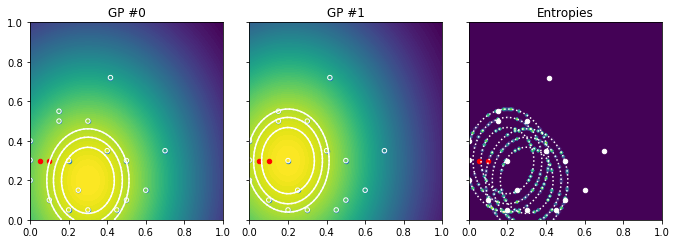

Iteration 9. new x: [[0.4  0.2 ]
 [0.4  0.15]]
Iteration 9. Evaluted function 0 to values: [0.63370502 0.63107007]
Iteration 9. Evaluted function 1 to values: [0.57819831 0.56627712]


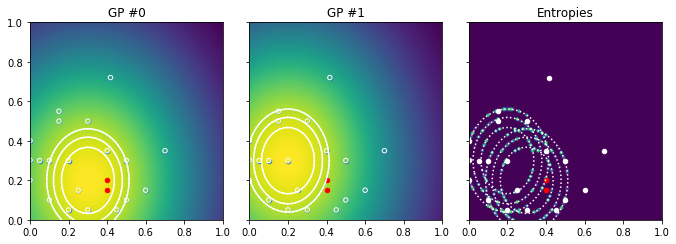

In [29]:
N_INIT  = 2
N_BATCH = 2
scandetails = scan([truth0,truth1])
X,y_list,gps = optimize.init(scandetails, seed = 1, n_init=N_INIT)

N_UPDATES = 10

def plot_and_save(workdir, index, *args,**kwargs):
    fig, axarr = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(9.5, 3.5)
    plt.title('Iteration {}'.format(index))
    plots.plot(axarr,gps,X,y_list,scandetails, **kwargs)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
plot_and_save(workdir, index, gps,X,y_list,scandetails, batchsize = N_INIT)
for index in range(N_UPDATES):
    newx, acqvals = optimize.gridsearch(gps, X, scandetails, batchsize=N_BATCH)

    print('Iteration {}. new x: {}'.format(index, newx))
    newys_list = [func(newx) for func in scandetails.truth_functions]
    for i,newys in enumerate(newys_list):
        print('Iteration {}. Evaluted function {} to values: {}'.format(index, i,newys))
        y_list[i] = np.concatenate([y_list[i],newys])
    X = np.concatenate([X,newx])
    
    gps = [get_gp(X,y_list[i]) for i in range(len(scandetails.truth_functions))]
    plot_and_save(workdir, index, gps,X,y_list,scandetails, batchsize=N_BATCH)
